In [1]:
#Importación de librerias
import pandas as pd
import numpy as np
import math as mt
from scipy import stats as st
from matplotlib import pyplot as plt


In [3]:
#Importación del dataset
df=pd.read_csv('games.csv')

#### Paso 2: Prepara los datos

In [4]:
#Análisis de la estructura del dataset
print(type(df))
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES

In [5]:
#Reemplazo de nombres de columnas
print(df.columns)

new_columns = []

for old_name in df.columns:
    name_lowered = old_name.lower()
    new_columns.append(name_lowered)

df.columns = new_columns
print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [6]:
#Manejo de valores ausentes en el dataset

#Revisamos aquellas columnas con valores ausentes para las columnas 'name' y 'genre'
print(df[df['genre'].isna()])
print(df[df['year_of_release'].isna()].head())

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  
                           name platform  year_of_release     genre  na_sales  \
183             Madden NFL 2004      PS2              NaN    Sports      4.26   
377            FIFA Soccer 2004      PS2              NaN    Sports      0.59   
456  LEGO Batman: The Videogame      Wii              NaN    Action      1.80   
475  wwe Smackdown vs. Raw 2006      PS2              NaN  Fighting      1.57   
609              Space Invaders     2600              NaN   Shooter      2.36   

     eu_sales  jp_sales  other_sales  critic_score user_score rating  
183      0.26      0.01         0.71          94.0    

In [7]:
#Al no conocer el nombre del videojuego y la categoria, mejor reemplazamos valores ausentes por 'Unknown' para crear una variable categórica
df['name'].fillna('Unknown',inplace=True)
df['genre'].fillna('Unknown',inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


C:\Users\jrcis\AppData\Local\Temp\ipykernel_8660\2201420634.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unknown',inplace=True)
C:\Users\jrcis\AppData\Local\Temp\ipykernel_8660\2201420634.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

Hemos podido identificar que tanto 'name' y 'genre' tienen la misma cantidad de filas con valores ausentes, y estas filas corresponden a videojuegos que desconocemos su nombre y genero. No las podemos eliminar dado que si contamos con el resto de su información. Al ver que tanto 'genre' y 'name' son columnas tipo 'object' y categoricas, optamos por renombrarlas. En vez de que sean NaN, las podemos renombrar por 'Unknow', asi tenemos una nueva categoria de videojuego

In [8]:
#La siguiente columna con valores ausentes es 'year of release' y además deseamos cambiar su tipo de dato de float64 a int 64
#dado que no tenemos porciones de años, por lo tanto todos los datos son enteros
#Dado que el método astype no puede convertir celdas con valores ausentes, rellenamos esas celdas con cero

df['year_of_release'].fillna('0',inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  object 
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), object(6)
memory usage: 1.4+ MB
None


C:\Users\jrcis\AppData\Local\Temp\ipykernel_8660\3812742049.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year_of_release'].fillna('0',inplace=True)
C:\Users\jrcis\AppData\Local\Temp\ipykernel_8660\3812742049.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['year_of_release'].fillna('0',inplace=True)


In [9]:
#Convertimos tipos de datos necesarios para el análisis
df['year_of_release']=df['year_of_release'].astype(int)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB
None


Para la columna 'year_of_release', vamos a reemplazar los valores ausentes por 0, ya que no buscamos hacer operaciones aritmeticas con esta columna, más adelante funcionará como variable categorica. Sin embargo, necesitamos reemplazar los NaN por algún número,para después transformar la columna en 'int'. Conclusión, si queremos rellenar los valores ausentes de'year of release', no nos sirve rellenando con la media o mediana, si no con un valor numérico como 0

In [10]:
#Vamos a analizar la columna de 'user_score', que es otra columna con valores ausentes
print(df['user_score'].value_counts(dropna=False))
df_user_null=df[df['user_score'].isna()]
print(df_user_null)

user_score
NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.3       2
1         2
0.9       2
0         1
9.7       1
Name: count, Length: 97, dtype: int64
                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713              

Tenemos 6701 valores ausentes y 2424 valores con el str 'TBD', sin embargo necesitamos cambiar el tipo de la columna de object a float. Dado que las celdas con 'TBD' no nos dan ninguna información valiosa para el análisis, las podemos reemplazar con NaN y poder transformar la columna a tipo float64

In [11]:
#Transformamos columna user_score de object a float usando el metodo to_numeric para que igual reemplace las celdas con 
#valores 'TBD' por NaN

df['user_score']=pd.to_numeric(df['user_score'], errors='coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


In [12]:
#Vamos a analizar la columna 'rating' que igual tiene valores ausentes

df['rating'].unique()
print(df['rating'].value_counts(dropna=False))

rating
NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64


Al ser una columna con valores categoricos, que es la clasificación del ESRB, el que sea tipo object es correcto. Sin embargo, tenemos 6766 valores nulos para esta columna con datos categoricos, considero es necesario asignarle un nombre 'Unknown' a estas caldas con valores ausentes. Antes de hacerlo, seria bueno imprimir algunas filas donde NaN sea el valor para 'Rating' y ver si identificamos algun patron para esas filas

In [13]:
df_rating_null=df[df['rating'].isna()]
print(df_rating_null)
print(df_rating_null['critic_score'].value_counts(dropna=False))
print(df_rating_null['user_score'].value_counts(dropna=False))

                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

In [14]:
#Reemplazamos por 'unknown' los valores ausentes en la columna 'rating'

df['rating'].fillna('Unknown', inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


C:\Users\jrcis\AppData\Local\Temp\ipykernel_8660\1421969713.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna('Unknown', inplace=True)


No se ve algun patron o tendencia con los valores ausentes de 'Rating' por lo que los vamos a renombrar con Unknown. Lo unico interesante es que, para las 6766 celdas con valores ausentes en rating, 6683 también lo son para 'critic_score' y 6680 también lo son para 'user_score'. Por ahora no vamos a eliminarlas ni rellenarlas, las vamos a dejar asi y posteriormente en el análisis, juagremos con estas celdas a como sea convenientes pero es importante no hacer modificaciones ahorita para no perder información que peuda ser valiosa.

Ahora ya tenemos nuestro dataset con unicamente dos columnas con valores ausentes, las dos columnas corresponden a aquellas que reflejan los puntajes de los videojuegos. Más adelante en el análisis, veremos si es conveniente o no, manipular esas filas con datos ausentes. Por ahora vamos a dejarlo asi.

In [15]:
#Por ultimo, agregamos una nueva columna con las ventas totales para cada juego
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Ma

In [16]:
#Confirmamos que no haya habido errores al hacer la suma de las columnas con las ventas
print(df['total_sales'].isna().sum())

0


¡Tenemos nuestro data set con los datos limpios y listos para su análisis!

### Paso 3 - Análisis de los datos

year_of_release
0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


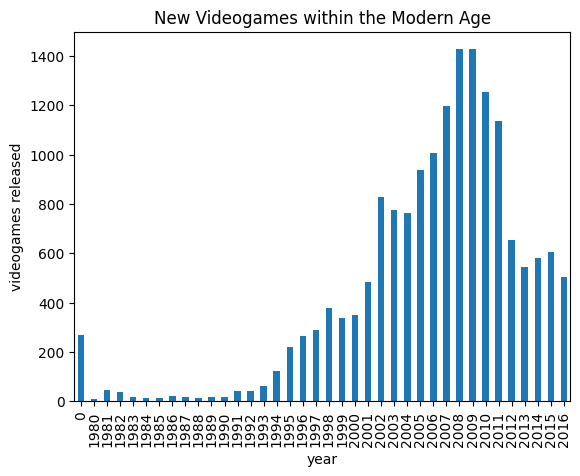

In [17]:
#Vamos a analizar los videojuegos lanzados al paso de los años

df_agr_year=df.groupby('year_of_release')['name'].count()
print(df_agr_year)
df_agr_year.plot(kind='bar', title='New Videogames within the Modern Age', xlabel='year', ylabel='videogames released')
plt.show()

Como era de esperarse, desde 1980 que se tiene el registro del primer videojuego lanzado, cada año va aumentando la cantidad de videojuegos, se empieza a ver un incremento significativo en la decada de los 90´s. La decada de los 00´s es el boom para la industria gamer, siendo 2008 y 2009 los años con mayor cantidad de videojuegos lanzados, a partir de 2010 comenzamos a ver una disminución en la cantidad de videojuegos relanzados. Dado que estamos trabajando en la campaña para 2017, tenemos que investigar el porque de esta disminución, ¿Ahora son menos competidores de desarrollo? ¿Varios videojuegos no se han logrado mantener en el mercado? ¿Se acabó la imaginación para desarrollar nuevos juegos? Vamos a investigarlo

Por último, tenemos valores en año '0', recordar que renombramos los valores ausentes para la columna 'year of release' para pdoer cambiar el tipo de objeto de esta columna, lo podemos considerar un valor atipico y descartar estos datos.

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


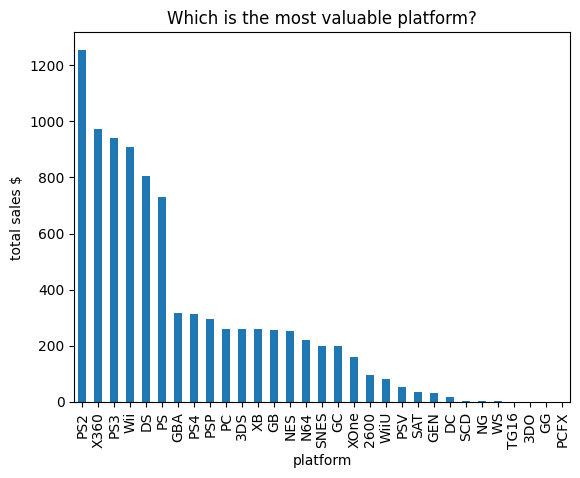

In [18]:
#Vamos a analizar las ventas por plataformas para poder ver aquellas que siguen vigentes y aquellas que perdieron valor

df_agr_platform=df.groupby(['platform'])['total_sales'].sum()
df_agr_platform = df_agr_platform.sort_values(ascending=False)
print(df_agr_platform)
df_agr_platform.plot(kind='bar',title='Which is the most valuable platform?',xlabel='platform',ylabel='total sales $')
plt.show()

Podemos identificar 6 plataformas que tienen significativamente más ventas que el resto, estas plataformas son: PS2, X360, PS3, Wii, DS y PS. Vamos a quedarnos con estas plataformas para hacer el análisis de sus ventas a lo largo de los años.

In [19]:
#Vamos a analizar a las plataformas con la mayor cantidad de ventas
df_agr_platform_top=df_agr_platform.head(6)
print(df_agr_platform_top)
top_platform = df_agr_platform_top.index
print(top_platform)
print(type(top_platform))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
Name: total_sales, dtype: float64
Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')
<class 'pandas.core.indexes.base.Index'>


In [20]:
#Se crea una tabla pivote con las 
df_platform=df.query('platform in @top_platform')
print(df_platform['platform'].unique())
df_pivot=df_platform.pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum')
df_pivot.fillna(0,inplace=True)
print(df_pivot)

['Wii' 'DS' 'X360' 'PS3' 'PS2' 'PS']
platform             DS      PS     PS2     PS3     Wii    X360
year_of_release                                                
0                  3.34    3.28   22.21    8.31   16.33   10.18
1985               0.02    0.00    0.00    0.00    0.00    0.00
1994               0.00    6.03    0.00    0.00    0.00    0.00
1995               0.00   35.96    0.00    0.00    0.00    0.00
1996               0.00   94.70    0.00    0.00    0.00    0.00
1997               0.00  136.17    0.00    0.00    0.00    0.00
1998               0.00  169.49    0.00    0.00    0.00    0.00
1999               0.00  144.53    0.00    0.00    0.00    0.00
2000               0.00   96.37   39.17    0.00    0.00    0.00
2001               0.00   35.59  166.43    0.00    0.00    0.00
2002               0.00    6.67  205.38    0.00    0.00    0.00
2003               0.00    2.07  184.31    0.00    0.00    0.00
2004              17.27    0.00  211.81    0.00    0.00    0.00
200

<Axes: title={'center': 'What platforms are still valid?'}, xlabel='year', ylabel='total sales $'>

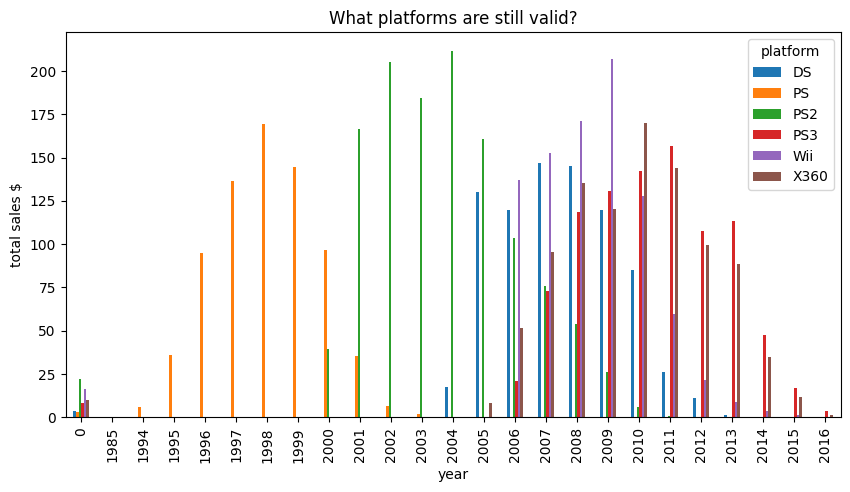

In [21]:
#Vamos a constuir las distribuciones de las ventas por plataforma a lo largo de los años

df_pivot.plot(kind='bar', figsize=(10,5), title='What platforms are still valid?',xlabel='year',ylabel='total sales $')

Conclusiones del gráfico: 

Durante la decada de los 90´s, la plataforma lider de ventas fue PS y vemos que la competencia no era tan fuerte como lo es ahora. Sin embargo, a partir del 2000, PS2 comenzó a cortar terrenos resecto a PS. Para 2004, PS ya habia desaparecido del mecado y PS2 se encontraba en sus niveles máximos de ventas. A partir de 2005, PS2 comienza a disminuir significativamente por el lanzamiento de nuevas plataformas como DS, PS3, Wii y X360. Estas fueron las plataformas lider durante el periodo entre 2006 y 2010, que es el periodo que igual mayor cantidad de videojuegos se lanzan. Hace sentido dado que es el periodo de tiempo que más opciones de plataformas se tienen en el mercado. DS y Wii disminuyen significativamente a partir de 2011, mientras que X360 y PS3  se mantienen en el mercado pero disminuyendo sus ventas a medida que vamos alcanzando el 2013. Lo utimos dos años 2015 y 2016, X360 y PS3 apenas y se asoman en ventas para estos ultimos años.

Vemos como el ciclo de vida en el mercado de cada una de las plataformas sigue una distribución normal, es decir, sigue la forma de una campana. Comienzan a incrementar significativamente hasta que llegan al pico más alto para despupes comenzar a disminuir. Esto se debe a la constante evolución e innovacion en este ambito. 

Sin embargo, las plataformas que analziamos no tienen mucha presencia en ventas en los ultimmos 3 años, por lo que si nos basamos en estos datos para hacer una campaña, seguramente tendremos malos resultados. Necesitamos analziar el comportamiento de las plataformas con mayor no. de ventas en los ultimso años para poder crear una exitosa campaña para el 2017. De igual forma, los datos de plataformas que incluso han desaparecido como PS, PS2, DS, etc no nos sirve en este momento, asi que podemos prescindir de ellas. Lo mejor sería filtrar nuestro data set a partir del año 2006, que es cuando empiezan a asomarse las plataformas que fueron lideres en el periodo en que más videojuegos se lanzaron, y ya no descartaremos aquellas plataformas que tal vez no figuren en la lista con más ventas pero que probablemente van iniciando su ciclo de vida en el mercado y son las ldieres actualmente en el mismo.

In [22]:
#Vamos a analziar el comprotamiento de las ventas por plataforma de 2010 a la actualidad
#Filtramos el Dataset con los juegos lanzados a partir de 2010
df_actual = df.query("year_of_release >= 2010")
print(df_actual)

                                 name platform  year_of_release         genre  \
14                 Kinect Adventures!     X360             2010          Misc   
16                 Grand Theft Auto V      PS3             2013        Action   
23                 Grand Theft Auto V     X360             2013        Action   
27        Pokemon Black/Pokemon White       DS             2010  Role-Playing   
29     Call of Duty: Modern Warfare 3     X360             2011       Shooter   
...                               ...      ...              ...           ...   
16703                Strawberry Nauts      PSV             2016     Adventure   
16707                Aiyoku no Eustia      PSV             2014          Misc   
16710   Samurai Warriors: Sanada Maru      PS3             2016        Action   
16712         Haitaka no Psychedelica      PSV             2016     Adventure   
16714             Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  

In [23]:
#Imprimimos todas las plataformas que han tenido ventas a partir del 2010
print(df_actual['platform'].value_counts())


platform
PS3     889
X360    680
3DS     512
DS      507
PSP     500
PC      479
Wii     450
PSV     429
PS4     392
XOne    247
WiiU    147
PS2      45
Name: count, dtype: int64


Empezamos a ver nombres de plataformas que habiamos descartado en el primer filtrado, vemos nombres como XOne, WiiU, 3DS, etc que son plataformas que tal vez estan comenzando a sustituir a las plataformas con mayor cantidad de ventas en nuestro dataframe como PS4, X360 o Wii. Sigamos con el análisis de encontrar las plataformas lideres en la actualidad

In [24]:
#Creamos una tabla pivote con las ventas por año por plataforma del 2006 a la actualidad
pivot_table_actual=df_actual.pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum')
print(pivot_table_actual)

platform           3DS     DS     PC   PS2     PS3     PS4    PSP    PSV  \
year_of_release                                                            
2010               NaN  85.02  24.28  5.64  142.17     NaN  35.04    NaN   
2011             63.20  26.18  35.03  0.45  156.78     NaN  17.82   4.63   
2012             51.36  11.01  23.22   NaN  107.36     NaN   7.69  16.19   
2013             56.57   1.54  12.38   NaN  113.25   25.99   3.14  10.59   
2014             43.76    NaN  13.28   NaN   47.76  100.00   0.24  11.90   
2015             27.78    NaN   8.52   NaN   16.82  118.90   0.12   6.25   
2016             15.14    NaN   5.25   NaN    3.60   69.25    NaN   4.25   

platform            Wii   WiiU    X360   XOne  
year_of_release                                
2010             127.95    NaN  170.03    NaN  
2011              59.65    NaN  143.84    NaN  
2012              21.71  17.56   99.74    NaN  
2013               8.59  21.65   88.58  18.96  
2014               3.75  22

Si nos enfocamos en los datos de los ultimos dos años, vemos que PS4 ha sido la plataforma lider en ventas, seguido de XOne y por útlimo valdria la pena mencionar a 3DS. Vamos a confirmarlo en nuestro gráfico

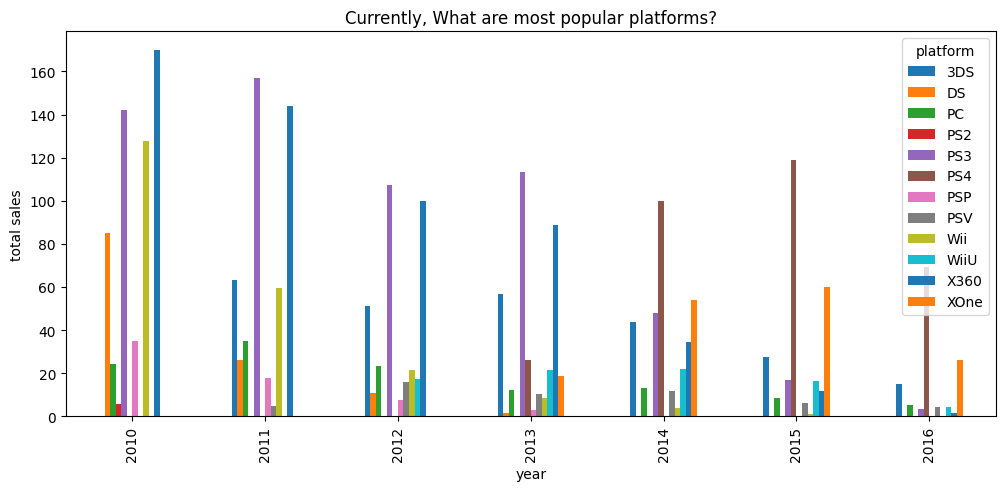

In [25]:
pivot_table_actual.plot(kind='bar',figsize=(12,5),title='Currently, What are most popular platforms?',xlabel='year',ylabel='total sales')
plt.show()

Conclusión del gráfico: Podemos ver los resultados del total de ventas en todas las regiones unicamente del año 2010 a 2016, dado que vimos que plataformas que eran lideres en años anteriores al 2010, ahora simplemente desaparecieron y surgieron alternativas con mejoras de ellas mismas. Del 2010 a 2013, PS3 y X360 son las paltaformas lideres. Sin embargo de 2014 a 2016, comienzan a surgir nuevas alternativas y entre 2014 y 2015 PS4 es la plataforma lider seguido de XOne. Por último, se ve una reducción en todas las plataformas del 2015 al 2016, por lo que habria que considerar lo siguiente: si existen nuevas plataformas que esten comenzando a surgir, si hubo una disminución en la venta de videojuegos y ¿porque? y analizar el comportamiento por región para acotar los resultados.

In [26]:
#Imprimimos la información de ventas totales para cada plataforma en el ultimo año para confirmar lo que vemos en el gráfico
df_last_two_years = df.query("year_of_release == 2016")
df_last_two_years_agr=df_last_two_years.groupby('platform')['total_sales'].sum()
print(df_last_two_years_agr.sort_values(ascending=False))

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64


Conclusión: La estrategia de mercado del año 2017 deberá contener videojuegos para las plataformas PSS4, XOne y 3DS. 

In [27]:
#Vamos a analizar el comportamiento de ventas para estas 3 plataformas
df_top=['PS4','XOne','3DS']
print(df_top)
#Filtramos el data set original con las filass que tienen ventas de estas unicas tres plataformas
df_top_platform=df.query('platform in @df_top')

['PS4', 'XOne', '3DS']


In [28]:
#Agrupamos el DF filtrado para obtener las ventas totales por juego por plataforma
#Empezamos con 3DS
df_top_platform_3DS = df_top_platform.query('platform == "3DS" and total_sales > 0')
df_top_platform_3DS = df_top_platform_3DS.groupby('name')['total_sales'].sum()
#print(df_top_platform_3DS)
#Calculamos medidas de estadistica descriptiva para ver la dispersión de los datos
print('La venta total minima de 3DS es de:',df_top_platform_3DS.min())
print('La venta total máxima de 3DS es de:',df_top_platform_3DS.max())
print('La mediana del total de ventas de 3DS es de:',df_top_platform_3DS.median())
print('La media del total de ventas de 3DS es de:', df_top_platform_3DS.mean())

#Seguimos con XOne
df_top_platform_XOne = df_top_platform.query('platform == "XOne" and total_sales > 0')
df_top_platform_XOne = df_top_platform_XOne.groupby('name')['total_sales'].sum()
#print(df_top_platform_XOne)
#Calculamos medidas de estadistica descriptiva para ver la dispersión de los datos
print('La venta total minima de XOne es de:',df_top_platform_XOne.min())
print('La venta total máxima de XOne es de:',df_top_platform_XOne.max())
print('La mediana del total de ventas de XOne es de:',df_top_platform_XOne.median())
print('La media del total de ventas de XOne es de:',df_top_platform_XOne.mean())

#Seguimos con PS4
df_top_platform_PS4 = df_top_platform.query('platform == "PS4" and total_sales > 0')
df_top_platform_PS4 = df_top_platform_PS4.groupby('name')['total_sales'].sum()
#print(df_top_platform_PS4)
#Calculamos medidas de estadistica descriptiva para ver la dispersión de los datos
print('La venta total minima de PS4 es de:',df_top_platform_PS4.min())
print('La venta total máxima de PS4 es de:',df_top_platform_PS4.max())
print('La mediana del total de ventas de PS4 es de:',df_top_platform_PS4.median())
print('La media del total de ventas de PS4 es de:',df_top_platform_PS4.mean())


La venta total minima de 3DS es de: 0.01
La venta total máxima de 3DS es de: 14.6
La mediana del total de ventas de 3DS es de: 0.12
La media del total de ventas de 3DS es de: 0.4980769230769231
La venta total minima de XOne es de: 0.01
La venta total máxima de XOne es de: 7.389999999999999
La mediana del total de ventas de XOne es de: 0.22
La media del total de ventas de XOne es de: 0.6450202429149796
La venta total minima de PS4 es de: 0.01
La venta total máxima de PS4 es de: 14.629999999999999
La mediana del total de ventas de PS4 es de: 0.2
La media del total de ventas de PS4 es de: 0.8013775510204081


In [29]:
#Graficamos el diagrama de caja y bigotes para ver la dispersión de las ventas totales por plataforma
#Graficamos boxplot para plataforma 3DS
import seaborn as sns
sns.boxplot(df_top_platform_3DS)


ModuleNotFoundError: No module named 'seaborn'

<AxesSubplot:xlabel='total_sales'>

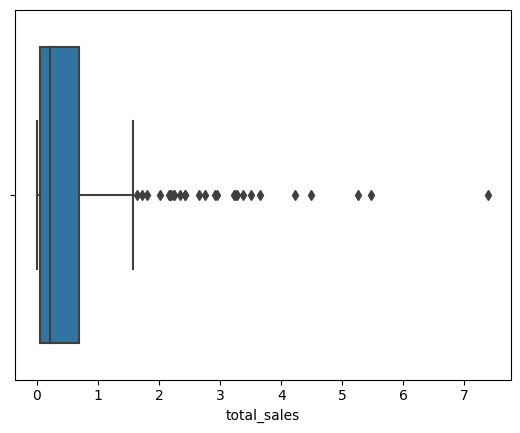

In [29]:
#Graficamos boxplot para plataforma XOne
sns.boxplot(df_top_platform_XOne)

<AxesSubplot:xlabel='total_sales'>

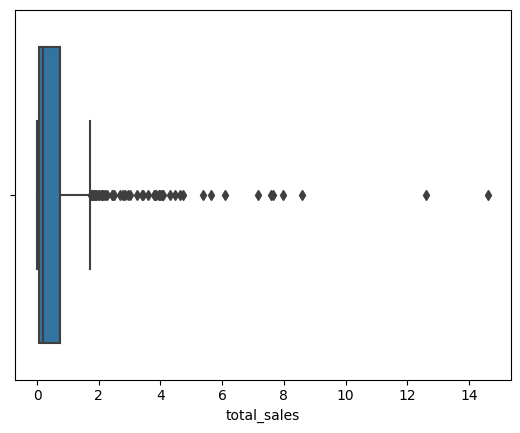

In [30]:
#Graficamos box plot para plataforma PS4
sns.boxplot(df_top_platform_PS4)

Para las 3 plataformas que elegimos a analizar para la campaña de 2017, vemos que su distribución de ventas totales por videojuego tiene mucha dispersión y lo podemos ver en los graficos Box Plot, se ven varios valores atípicos, al imprimir sus medidas descriptivas vemos que sus datos tienen rangos altos, se tienen registradas ventas de apenas 0.1$ hasta 14$, por ende la diferencia entre mediana y media es significativa. Por ultimo, vemos que el 50% de los juegos (IQR) para las 3 plataformas tienen una venta total de entre 0$ y 1$.

Al final esto se traduce en que, hay videojuegos en específicos que se venden mucho más que otros en cada plataforma. Por lo que en la estrategia, se deben de considerar campañas de mercadeo, disponibilidad y promociones para dichos juegos que son más perferidos en el mercado ya que hacen una gran diferencia en el ingreso por videojuegos.

In [30]:
#Vamos a evaluar la correlación entre las criticas de los videojuegos y sus ventas
#Vamos a utilizar como referencia los datos de la plataforma PS3 que es la plataforma que más ventas ha tenido en el útlimo año

df_PS4 = df.query('platform == "PS4"')
print(df_PS4.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 31 to 16585
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             392 non-null    object 
 1   platform         392 non-null    object 
 2   year_of_release  392 non-null    int64  
 3   genre            392 non-null    object 
 4   na_sales         392 non-null    float64
 5   eu_sales         392 non-null    float64
 6   jp_sales         392 non-null    float64
 7   other_sales      392 non-null    float64
 8   critic_score     252 non-null    float64
 9   user_score       257 non-null    float64
 10  rating           392 non-null    object 
 11  total_sales      392 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 39.8+ KB
None


El coeficiente de correlación entre las ventas totales de PS4 y el puntaje de CRITICOS de videojuegos es de: 0.4065679020617816


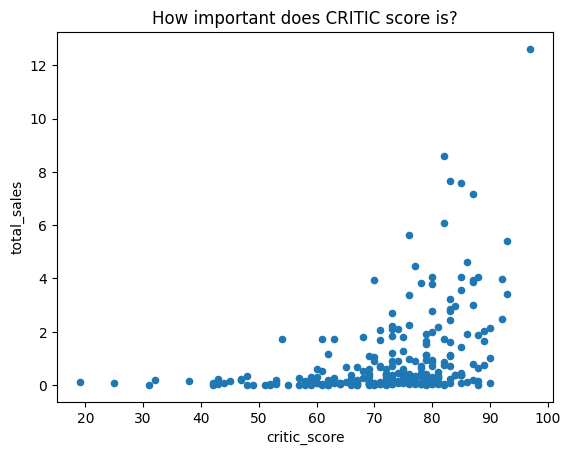

In [31]:
critic_score_corr=df_PS4['critic_score'].corr(df_PS4['total_sales'])
print('El coeficiente de correlación entre las ventas totales de PS4 y el puntaje de CRITICOS de videojuegos es de:', critic_score_corr)
df_PS4.plot(x='critic_score',y='total_sales',kind='scatter',title='How important does CRITIC score is?')
plt.show()

El coeficiente de correlación entre las ventas totales de PS4 y el puntaje de USUARIOS de videojuegos es de: -0.03195711020455643


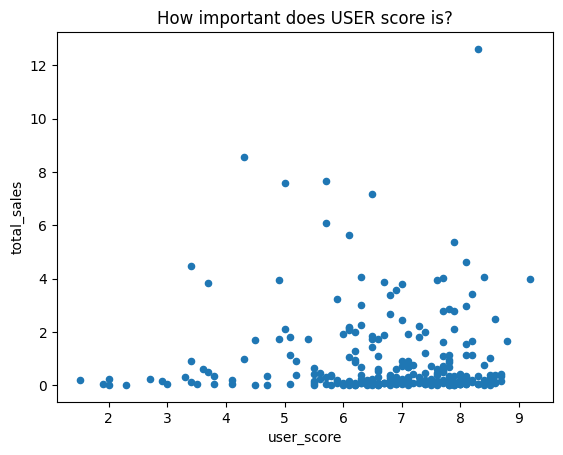

In [32]:
#Ahora toca hacer la correlación entre el puntaje de los usuarios y las ventas de los videojuegos de PS4
user_score_corr=df_PS4['user_score'].corr(df_PS4['total_sales'])
print('El coeficiente de correlación entre las ventas totales de PS4 y el puntaje de USUARIOS de videojuegos es de:', user_score_corr)
df_PS4.plot(x='user_score',y='total_sales',kind='scatter',title='How important does USER score is?')
plt.show()

Conclusión sobre la correlación: Las reseñas de criticos y las ventas totales de PS4 tienen un coeficiente de correlación de 0.4 (correlación positiva) mientras que el coeficiente de correlación entre la reseña de usuarios y las mismas ventas de PS4 es de -0-03 (casi 0, no existe correlación). Es decir, mientras la reseña de criticos sea mayor, hay mayor probabilidad de que un videojuego lo compren más personas. Por otra parte, la compra de videojuegos no depende de la reseña que tengan los usuarios de los mismos. 

El coeficiente de correlación entre las ventas totales de XOne y el puntaje de CRITICOS de videojuegos es de: 0.4169983280084017


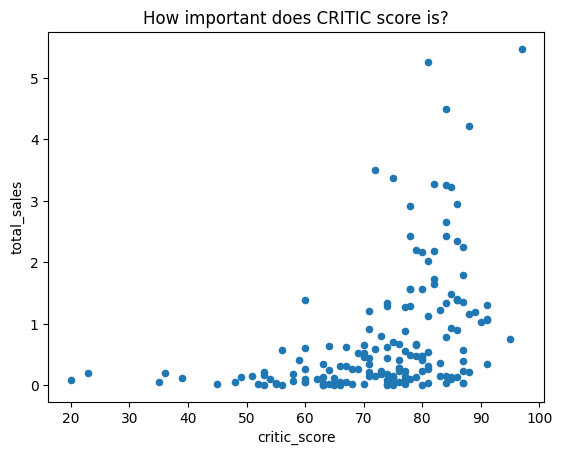

El coeficiente de correlación entre las ventas totales de XOne y el puntaje de USUARIOS de videojuegos es de: -0.06892505328279416


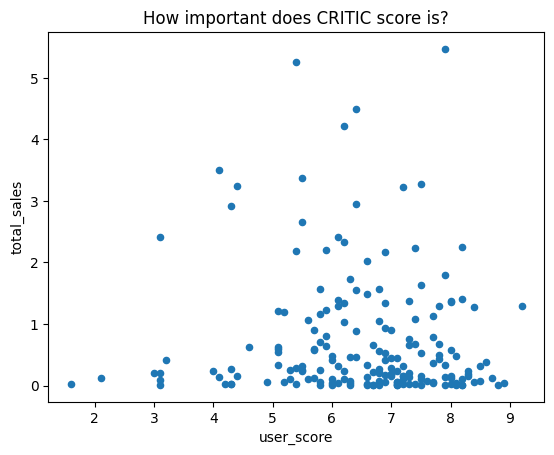

In [33]:
#Vamos a hacer el mismo análisis de correlación, pero ahora con la plataforma XOne, que fue la segunda con mayor numero de ventas en el 2016
df_XOne= df.query('platform == "XOne"')

critic_score_corr_xone=df_XOne['critic_score'].corr(df_XOne['total_sales'])
print('El coeficiente de correlación entre las ventas totales de XOne y el puntaje de CRITICOS de videojuegos es de:', critic_score_corr_xone)
df_XOne.plot(x='critic_score',y='total_sales',kind='scatter',title='How important does CRITIC score is?')
plt.show()

user_score_corr_xone=df_XOne['user_score'].corr(df_XOne['total_sales'])
print('El coeficiente de correlación entre las ventas totales de XOne y el puntaje de USUARIOS de videojuegos es de:', user_score_corr_xone)
df_XOne.plot(x='user_score',y='total_sales',kind='scatter',title='How important does CRITIC score is?')
plt.show()

Conclusiones: Al evaluar las correlacion entre las reseñas y las ventas, pero ahora para la plataforma XOne, obtenemos los mismos resultados que para la plataforma PS3.

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Unknown            2.42
Name: total_sales, dtype: float64


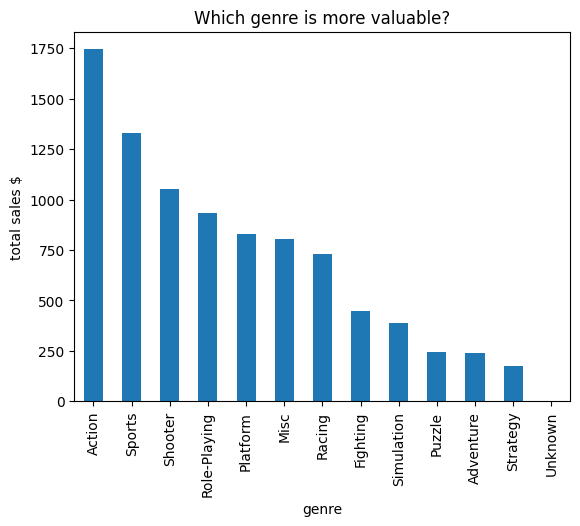

In [34]:
#Vamos a analizar la distribución de los ingresos por genero de los videojuegos

df_genre=df.groupby('genre')['total_sales'].sum()
df_genre = df_genre.sort_values(ascending=False)
print(df_genre)

df_genre.plot(kind='bar',title='Which genre is more valuable?',xlabel='genre',ylabel='total sales $')
plt.show()

Conclusión: Los 3 generos de videojuegos con mayor cantidad de ventas para todas las regiones son: Ation, Sports y Shooter. Mientras que los 3 generos con menor ventas son: Puzzle, Adventure y Strategy. Unknown lo podemos no considerar dado que fue el nombre que le dimos a aquellos videojuegos que llevaban un valor ausente por genero.

Por último, de acuerdo a toda la información que acabamos de analizar, la empresa deberá trabajar su campaña de mercadeo en la combinación de las tres principales plataformas (PS4, XOne, 3DS) y los tres generos más populares (Action, Sports, Shooter)

### Paso 4: Crea un perfil de usuario para cada región

In [35]:
#Vamos a obtener las 5 plataformas que más ventas tienen en las tres regiones que estamos estudiando

#Obtenemos las 5 plataformas más vendidas para NorteAmerica
df_na_sales= df.groupby('platform')['na_sales'].sum()
df_na_sales=df_na_sales.sort_values(ascending=False)
df_na_sales=df_na_sales.head()


#Obtenemos las 5 plataformas más vendidas para Europa
df_eu_sales = df.groupby('platform')['eu_sales'].sum()
df_eu_sales = df_eu_sales.sort_values(ascending=False)
df_eu_sales=df_eu_sales.head()


#Obtenemos las 5 plataformas más vendidas para Japón
df_jp_sales = df.groupby('platform')['jp_sales'].sum()
df_jp_sales = df_jp_sales.sort_values(ascending=False)
df_jp_sales = df_jp_sales.head()


#Unimos los 3 Series con las 5 plataformas mas vendidas por área para ver las diferencias

top_platform_per_area = pd.concat([df_na_sales,df_eu_sales,df_jp_sales], axis='columns')
print(top_platform_per_area)


          na_sales  eu_sales  jp_sales
platform                              
X360        602.47    270.76       NaN
PS2         583.84    339.29    139.20
Wii         496.90    262.21       NaN
PS3         393.49    330.29       NaN
DS          382.40       NaN    175.57
PS             NaN    213.61    139.82
SNES           NaN       NaN    116.55
3DS            NaN       NaN    100.67


Conclusión:  La unica plataforma que figura dentro de las que más generan ingresos para las tres regiones es o fue: PS2; por otra parte, el comportamiento entre Norte Ameria y Europa es muy similar en cuanto a ingresos por plataformas. 4 de las 5 plataformas con más ingresos son comunes entre Europa y Norteamerica. Mientras que para Japón, solo PS2 comparte también para Europa y Norte America. Por ende, la campaña de mercadeo debe ser especifica para el público japonés a diferencia del público occidental.

In [36]:
#Vamos a obtener los 5 generos preferidos por área


#Obtenemos los 5 géneros más vendidas para NorteAmerica
df_na_genre= df.groupby('genre')['na_sales'].sum()
df_na_genre=df_na_genre.sort_values(ascending=False)
df_na_genre=df_na_genre.head()


#Obtenemos los 5 géneros más vendidas para Europa
df_eu_genre = df.groupby('genre')['eu_sales'].sum()
df_eu_genre = df_eu_genre.sort_values(ascending=False)
df_eu_genre=df_eu_genre.head()


#Obtenemos los 5 géneros más vendidas para Japón
df_jp_genre = df.groupby('genre')['jp_sales'].sum()
df_jp_genre = df_jp_genre.sort_values(ascending=False)
df_jp_genre = df_jp_genre.head()

#Unimos los 3 Series con los 5 géneros mas vendidas por área para ver las diferencias

top_genre_per_area = pd.concat([df_na_genre,df_eu_genre,df_jp_genre], axis='columns')
print(top_genre_per_area)

              na_sales  eu_sales  jp_sales
genre                                     
Action          879.01    519.13    161.43
Sports          684.43    376.79    135.54
Shooter         592.24    317.34       NaN
Platform        445.50       NaN    130.83
Misc            407.27    212.74    108.11
Racing             NaN    236.51       NaN
Role-Playing       NaN       NaN    355.41


Así como vimos anteriormente, los generos de Action y Sport son los que más venden a nivel global, y dentro del análisis por área, también se mantienen como de los principales para cada región. Pero, Oh Sorpresa, para Japón, tenemos un genero que es incluso más popular que estos dos y es 'Role-Playing', además vemos que NO se tienen ventas para el genero 'Shooter' en Japón, tal vez por alguna regulación del gobierno. Ahora sabemos el por que la esperanza de vida en Japón es más alta que en cualquier otro país.

In [38]:
#Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

###Paso 5: Prueba las siguientes hipótesis:
— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [37]:
#Vamos a comprobar la hipótesis nula de que las calificaciones promedio de los usuarios de Xbox One y PC son iguales
#Generamos los arreglos para cada población a evaluar
df_users_score_XOne = df.query('platform == "XOne"')['user_score']
df_users_score_XOne.dropna(inplace=True)

df_users_score_PC = df.query('platform == "PC"')['user_score']
df_users_score_PC.dropna(inplace=True)

#Antes de iniciar con la prueba de hipótesis, corrroboremos si las varianzas de ambas poblaciones son iguales
print('La varianza de las calificaciones de XOne es:', df_users_score_XOne.var())
print('La varianza de las calificaciones de OC es:', df_users_score_PC.var())

#Para confirmar que las varianzas no son iguales, haremos una prueba de hipótesis con el metodo levene
results_var=st.levene(df_users_score_XOne, df_users_score_PC)
print('El P Value para la prueba Levene es de:', results_var.pvalue)
if results_var.pvalue < 0.05:
    print('Rechazamos la hipótesis nula: Las varianzas de las poblaciones NO son iguales')
else:
    print('No podemos rechazar la Hipótesis nula, no podemos concluir que las varianzas son diferentes')

#Vamos a usar pruebas de hipótesis para dos poblaciones considerando el resultado de la prueba Levene como argumento para Ttest
result = st.ttest_ind(df_users_score_XOne, df_users_score_PC, equal_var=True)
print(result.pvalue)
if result.pvalue < 0.05:
    print('Rechazamos la Hipótesis nula')
else:
    print('No podemos rechazar la Hipótesis nula')


La varianza de las calificaciones de XOne es: 1.9069968429360695
La varianza de las calificaciones de OC es: 2.3407871413372066
El P Value para la prueba Levene es de: 0.2693951512047048
No podemos rechazar la Hipótesis nula, no podemos concluir que las varianzas son diferentes
1.3896435533548819e-05
Rechazamos la Hipótesis nula


C:\Users\jrcis\AppData\Local\Temp\ipykernel_8660\3484385130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_score_XOne.dropna(inplace=True)
C:\Users\jrcis\AppData\Local\Temp\ipykernel_8660\3484385130.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_score_PC.dropna(inplace=True)


Hipótesis Nula: Los promedios de reseñas de usuarios para la plataforma Xbox One y PC son iguales
Hipótesis Alternativa: Los promedios de reseñas de usuarios para la plataforma Xbox One y PC son diferentes

Conclusión: Podemos asegurar con un 95% de confianza que los puntajes promedios de los usuarios tanto de la plataforma Xbox One y PC son diferentes.

In [38]:
#Vamos a comprobar la hipótesis nula de que las calificaciones promedio de los usuarios para los generos Action y Sports
#Generamos los arreglos para cada población a evaluar
df_users_score_action = df.query('genre == "Action"')['user_score']
df_users_score_action.dropna(inplace=True)

df_users_score_sports = df.query('genre == "Sports"')['user_score']
df_users_score_sports.dropna(inplace=True)

#Antes de iniciar con la prueba de hipótesis, corrroboremos si las varianzas de ambas poblaciones son iguales
print('La varianza de las calificaciones de Action es:', df_users_score_action.var())
print('La varianza de las calificaciones de Sports es:', df_users_score_sports.var())

#Para confirmar que las varianzas no son iguales, haremos una prueba de hipótesis con el metodo levene
results_var_2=st.levene(df_users_score_action, df_users_score_sports)
print('El P Value para la prueba Levene es de:', results_var_2.pvalue)
if results_var_2.pvalue < 0.05:
    print('Rechazamos la hipótesis nula: Las varianzas de las poblaciones NO son iguales')
else:
    print('No podemos rechazar la Hipótesis nula, no podemos concluir que las varianzas son diferentes')

#Vamos a usar pruebas de hipótesis para dos poblaciones considerando el resultado de la prueba Levene como argumento para Ttest
result_genre = st.ttest_ind(df_users_score_action, df_users_score_sports, equal_var=False)
print(result_genre.pvalue)
if result_genre.pvalue < 0.05:
    print('Rechazamos la Hipótesis nula')
else:
    print('No podemos rechazar la Hipótesis nula')

La varianza de las calificaciones de Action es: 2.031746898033205
La varianza de las calificaciones de Sports es: 2.5965147189730033
El P Value para la prueba Levene es de: 0.0001736640672727649
Rechazamos la hipótesis nula: Las varianzas de las poblaciones NO son iguales
0.11483818791498286
No podemos rechazar la Hipótesis nula


C:\Users\jrcis\AppData\Local\Temp\ipykernel_8660\751365418.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_score_action.dropna(inplace=True)
C:\Users\jrcis\AppData\Local\Temp\ipykernel_8660\751365418.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_score_sports.dropna(inplace=True)


Se ha agregado la prueba Levene antes de la prueba Ttest para comprobar si las varianzas de las poblaciones donde fueron obtenidas ambas muestras a estudiar son iguales o no. Con el resultado de la prueba Levene es que podemos definir el argumento del metodo ttest en equal_var y poder hacer la comparación de ambas muestras para determinar si son iguales o no.

Hipótesis nula: El promedio de la calificaciones de los usuarios para los generos Acción y Sports son iguales (la hipótesis nula siempre representa igualdad)
Hipótesis alternativa: El promedio de la calificaciones de los usuarios para los generos Acción y Sports son diferentes

Conclusión: Con un 95% de confianza, podemos decir que NO existe evidencia suficiente para decir que el promedio de las califiaciones de los usuarios para los géneros Action y Sports son Diferentes.

### Conclusión General

Ha sido un viaje fascinante el analizar esta base de datos sobre videojuegos: tantas cosas que podemos asumir pero mientras más nos vamos adentrando al análisis, más vamos derrumbando hipótesis que teniamos en un principio.

1) Preparación de los datos:
    Esta vez los datos estaban en buenas condiciones, salvo que si tuvimos que realizar algún par de acciones. En general los datos venian bien estructurados, aquellas columnas con las ventas no tenian valores ausentes, no se tenian filas duplicadas y los tipos de datos de casi todas las columnas, eran los adecuados. Las columnas que SI contaban con bastantes valores ausentes eran las de las reseñas y también para los años de lanzamiento, que se pudieron reemplazar por 0 para evitar borrar aquellos videojeugos que no tenian registro de año de lanzamiento. Aquí fue importante identificar que columnas son variables categóricas y cuales numéricas para no perder información al momento de preparar los datos.
    
2) Análisis de los datos:
    2.1) El mundo de los videojuegos es ciclico, no tenemos ninguna plataforma que haya mantenido a lo largo de los años. Todas alcanzan un pico de popularidad y apartir de ahi comienzan a perder terreno. Y es por la evolución en el desarrollo de nuevas plataformas, esa seria la explicación a este comportamiento.
    2.2) Fue importante identificar que teniamos que acortar el periodo de tiempo al analizar los datos para la estrategia del año 2017, fue ahí donde pudimos obtener las plataformas más populares que probablemente se mantengan para el 2017 y a las cuales la compañia debe apostar. 
    2.3) También vimos que la distribución de ventas para distintos videojuegos no es la misma y tienen mucha dispersión. Es decir, hay videojuegos significativamente más populares que otros, por lo tanto la empresa deberá indeitificar aquellos videojuegos más populares y traerlos a sus vitrinas.
    2.4) Los mercados regionales y sus comportamientos son distintos. Pudimos ver que las preferencias de videojuegos y plataformas en Japón es significativamente distinta a las de otras regiones del mundo.
    2.5) También vimos que las reseñas recibidas por criticos para un videojuego, pueden influir de manera positiva en la elección de un usuario para la compra del mismo. Sin embargo, no pasaba lo mismo para con las reseñas de los usuarios.

3) Pruebas de hipótesis:
    3.1) Establecimos un nivel de significancia del 95% dado que es el mpas comunmente usado; podemos retroalimentar a la compañia que mientras más se puedan acotar sus estrategias de mercadeo, mejores resultados podrán obtener dado que cada población es distinta y lo vimos por regiones, por plataformas y por generos. 
    3.2) La reseña promedio de los usuarios de Xbox One y de PC son distintas
    3.3) No hay evidencia suficiente para asegurar que las reseñas promedios para los videojuegos de los géneros más populares: Acción y Deportes son diferentes.
    